##Architecture of a regression model

* Input shapes and output shapes(features and labels)
* Creating custom data to view and fit
* Steps in modeling:
  * Creating a model
  * Compiling a model
  * Fiting a model
  * Evaluating a model
* Different evaluating models
* Saving and **loading** models

https://www.youtube.com/watch?v=tpCFfeUEGs8&t=11793s

##Introduction to Regression Neural Networks with TensorFlow

  Predicting a numerical value based on some other combination of variables.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0


## Creating data to view and fit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Create the features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]) #Indepandeble variables

In [ ]:
#Create the labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]) #Dependable variables

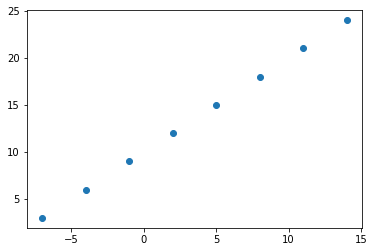

In [ ]:
#Visualize it
plt.scatter(X,y)

## Input and output shapes

In [ ]:
#Creating a demo for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
#Turning our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

##Steps on modeling with TensorFlow c:

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (the function wich tells us how wrong the model is) and the optimizer (tells the model how to improve the patters its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels). 

In [ ]:
#Seting random seed 
tf.random.set_seed(42)

# 1.Create a model using the sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2.Compile the model 
model.compile(loss=tf.keras.losses.mae, #mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #stochasitc gradient descent
              metrics=["mae"])

# 3.Fit the model
model.fit(X, y, epochs=5) 

Epoch 1/5
1/1 [==============================] - 1s 639ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Make a prediction with our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to creat it.

1. **Creating a model** - We might add more layers, increase the number of hidden units(also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - We might change the optimization function or the **learning rate** of the optimization function.  
3. **Fitting a model** - Fit a model for more **epochs** or on more data 



In [ ]:
# Lets rebuild our model
#1.creating the model
model1 = tf.keras.Sequential([
                              tf.keras.layers.Dense(1)
])

#2.Compiling
model1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

#3.Fit the model
model1.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 300ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 19

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
model1.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
#making more changes
#creating the model 
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(50, activation=None),
                             tf.keras.layers.Dense(1)
])

#compiling
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

#fitting
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 355ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4150 - mae: 10.4150
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 9.0104 - mae: 9.0104
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 7.3315 - mae: 7.3315
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss:

In [ ]:
model.predict([17.0])

array([[26.58353]], dtype=float32)

##Evaluating a model's performance

Workflow when building a model:

```
Build a model -> Fit it -> Evaluate it -> Tweak the model -> Fit it -> Evaluate it...
```

In [ ]:
#Making a bigger data set
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
#Making labels for the data set
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

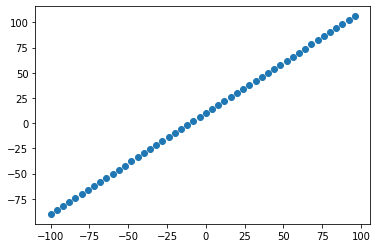

In [ ]:
#Ploting
plt.scatter(X,y)

## The 3 sets...

* **Training set** - the model learns from this data, wich is typically 70-80% of the total data
* **Validation set** - the model gets tuned on this data, 10-15% of the data available.
* **Test set** - the model gets evaluated on this set, 10-15% of the data.



In [ ]:
#lenght of samples
len(X)

50

In [ ]:
#Spliting the data into train sets
X_train = X[:40] #first 40 elements are to train (80%)
y_train = y[:40]

X_test = X[40:] #last 10 elements of 50 (20%)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

##Visualizing the data

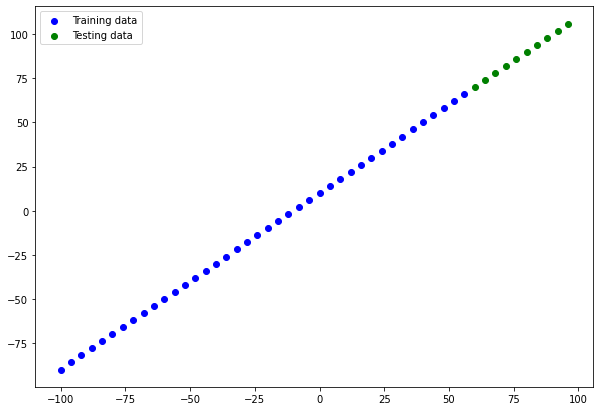

In [ ]:
plt.figure(figsize=(10,7))
#ploting the train data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
#ploting the test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
#show a legend
plt.legend();

In [ ]:
#Creating yet another model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#model.fit(X_train, y_train, epochs=100)

##Visualizing the model


In [ ]:
#model.summary()

In [ ]:
#Creating a model that automatic builds it self by defining the `input_shape` argument in the first layer
tf.random.set_seed(42)

#model same as above
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
                             tf.keras.layers.Dense(1, name="output_layer")
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


##Definitions
* **Total params** - Number of total parameters on our model
* **Trainable params** - Number of parameters (patterns) the model can update as it's training.
* **Non-trainable params** - These parameters aren't updated during training (when you bring already learn patters or parameters from other models during **transfer learning**).

MIT intro to deep learning http://introtodeeplearning.com/


In [ ]:
#Fiting the model 
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
#Getting a new summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model

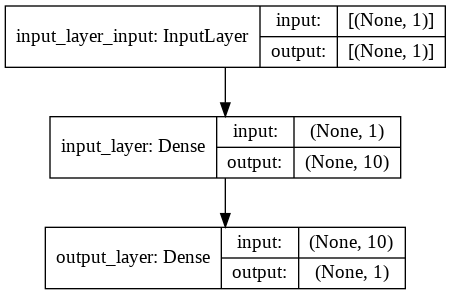

In [ ]:
plot_model(model, show_shapes=True)

##Visualizing our model's predictions
To visualize predictions, ploting them against the ground truth labels.

Often see this as `y_test` or `y_true` versus `y_pred`.

In [ ]:
# Making some predictions 
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

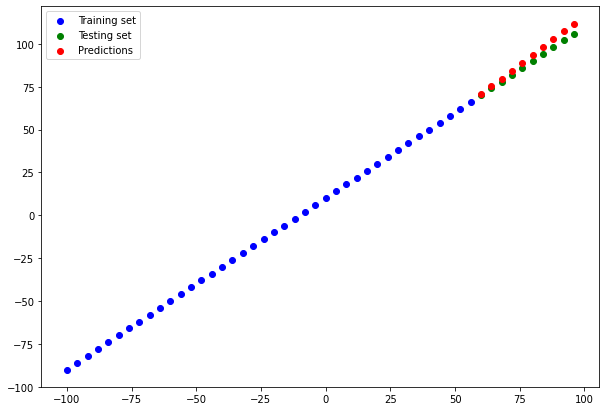

In [ ]:
#Creating a plot function
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label="Training set")
  plt.scatter(test_data, test_labels, c="g", label="Testing set")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend();

plot_predictions()

##Evaluating our model with regression evaluation metrics

Depending on the problem there will be different types of evaluation metrics and performance.

Two main ones with regression are:
* **MAE** - mean absolute error (on average how wrong is each of the model's predictions).
* **MSE** - mean square error (square the average erros).

In [ ]:
#Evaluating the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 117ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [ ]:
#Calculating the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [ ]:
#Creating mae again
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred)) #Both sets need to be the same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
#Calculating the mean square error
mse =tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [ ]:

def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

In [ ]:
y_pred = tf.squeeze(y_pred)
mae(y_test,y_pred), mse(y_test,y_pred)

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

##Runing experiments to improve our model

1. Get more data
2. Make our model larger
3. Train for longer

Doing 3 different model experiments:
1. `model_1` - Same model but with 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

**model_1**

In [ ]:
#model 1
tf.random.set_seed(42)
model_1= tf.keras.Sequential([
                              tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(X_train, y_train, epochs=100, verbose=0)

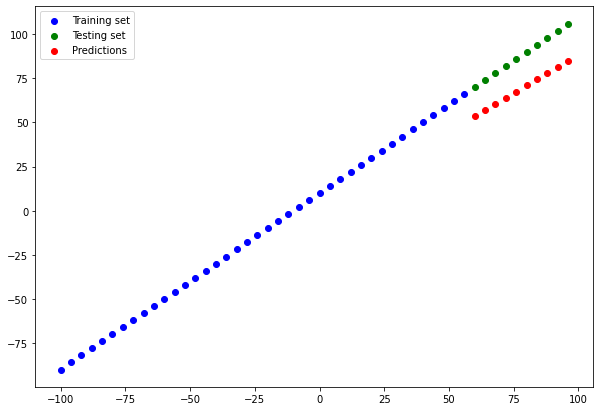

In [ ]:
#Making predictions
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1) 

In [ ]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_pred_1.squeeze()).numpy()
mse_1 = mse(y_test, y_pred_1.squeeze()).numpy()
mae_1, mse_1

(18.745327, 353.57336)

**model_2**

In [ ]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
                             tf.keras.layers.Dense(1),
                             tf.keras.layers.Dense(1) #adding 1 more layer
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(X_train, y_train, epochs=100, verbose=0)

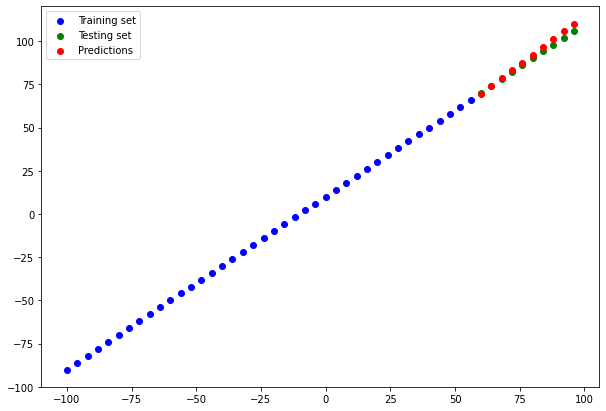

In [ ]:
#Ploting the model againts the test data
y_pred_2 = model_2.predict(X_test) #predicting 
plot_predictions(predictions=y_pred_2)

In [ ]:
#measure mae and mse
mae_2 = mae(y_test, tf.squeeze(y_pred_2)).numpy() #.numpy() is so the information looks better
mse_2 = mse(y_test, tf.squeeze(y_pred_2)).numpy()
mae_2, mse_2

(1.9098114, 5.459232)

**model_3 with more hidden units**

In [ ]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
                             tf.keras.layers.Dense(1),
                             tf.keras.layers.Dense(1) #adding 1 more layer
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics=["mae"])

model_3.fit(X_train, y_train, epochs=100, verbose=0)

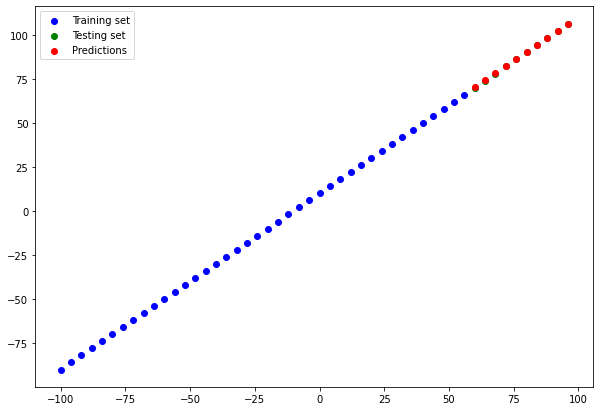

In [ ]:
#Ploting the model againts the test data
y_pred_3 = model_3.predict(X_test) #predicting 
plot_predictions(predictions=y_pred_3)

In [ ]:
#measure mae and mse
mae_3 = mae(y_test, tf.squeeze(y_pred_3)).numpy() #.numpy() is so the information looks better
mse_3 = mse(y_test, tf.squeeze(y_pred_3)).numpy()
mae_3, mse_3

(0.25703734, 0.06872617)

In [ ]:
y_pred_3, y_test

(array([[ 70.17626 ],
        [ 74.194214],
        [ 78.212166],
        [ 82.23012 ],
        [ 86.24806 ],
        [ 90.266014],
        [ 94.28396 ],
        [ 98.30191 ],
        [102.31986 ],
        [106.33781 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

##Comparing our models using pandas DataFrame

In [ ]:
import pandas as pd

In [ ]:
model_results= [["model_1", mae_1, mse_1],
                ["model_2", mae_2, mse_2],
                ["model_3", mae_3, mse_3]]

all_results = pd.DataFrame(model_results, columns=["model1", "mae", "mse"])
all_results

,model1,mae,mse
0,model_1,18.745327,353.573364
1,model_2,1.909811,5.459232
2,model_3,0.257037,0.068726


##Tracking expirements
Always track the results of experiments. **There are tools to help us.**

📖 Resource: But as you build more models, you'll want to look into using tools such as:

**TensorBoard** - a component of the TensorFlow library to help track modelling experiments (we'll see this later).https://tensorboard.dev/

**Weights & Biases** - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).https://www.wandb.com/

##Saving models
1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model with SavedModel
model_3.save("bestresult_model3_savedFormat")

INFO:tensorflow:Assets written to: bestresult_model3_savedFormat/assets


In [ ]:
#Saving using HDF5 (should use for big data files and when running outside of tensorFlow env)
model_2.save("worstresult_model2_HDF5_format.h5")


##Loading in a saved model


In [ ]:
#Loading a SavedFormat model
loaded_SavedModel_format = tf.keras.models.load_model("/content/bestresult_model3_savedFormat")
loaded_SavedModel_format.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Comparing model_3 predictions with the saved model
model_3_preds = model_3.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_3_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Loading in using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/worstresult_model2_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Comparing results
model_2_preds = model_2.predict(X_train)
loaded_h5_model_preds = loaded_h5_model.predict(X_train)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

##How to dowload a model (or any file) from Google Colab
1. You can go to the "files" tab and right click on the file you are after and click download.
2. Use code (see cell below).
3. Save it to google drive by connecting to google drive and copying it there (see second cell below).

In [ ]:
#Downloading from google colab
from google.colab import files
#files.download("/content/worstresult_model2_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (needs to mount the drive first onto the files.) #!cp means copy
#!cp /content/bestresult_model3_savedFormat /content/drive/MyDrive

cp: cannot stat '/content/bestresult_model3_savedFormat.h5': No such file or directory


## A larger example
its on another file as insurance linear regression